In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tabulate import tabulate

In [8]:
!wget https://www.dropbox.com/s/8l7ced95mb4k9ds/dataAll.txt
!wget https://www.dropbox.com/s/jad0ciovllm7y2y/data1.txt
!wget https://www.dropbox.com/s/mnzqvzttfan3r3f/dataHoldout.txt

--2021-10-28 13:23:20--  https://www.dropbox.com/s/8l7ced95mb4k9ds/dataAll.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/8l7ced95mb4k9ds/dataAll.txt [following]
--2021-10-28 13:23:20--  https://www.dropbox.com/s/raw/8l7ced95mb4k9ds/dataAll.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc850348607145584cb8bb34eedf.dl.dropboxusercontent.com/cd/0/inline/BY5kv_MICVAzyEzgsmmogAV7ZG0ZueNwZbuazMpSgWkAvpQ0A0sOG_2_RkN6Ym0tcerqKKgdBBtcbwkIofBP7G-DT25nVZTmpSQDST6CUh2Y_xMK6t7XZtOGldvGbnXVuVvXFCn4uIDN1qt2oBPhRoOR/file# [following]
--2021-10-28 13:23:20--  https://uc850348607145584cb8bb34eedf.dl.dropboxusercontent.com/cd/0/inline/BY5kv_MICVAzyEzgsmmogAV7ZG0ZueNwZbuazMpSgWkAvpQ0A0sOG_2_RkN6Ym0tcerqKKgdBBtcbwkIofBP7G-DT25nV

#Parte 1: Resolvendo um Problema Linearmente Separável

In [17]:
def ler_entrada(path):

  array = np.fromfile(path)
  array = array.ravel()
  colunas = 3
  array = array.reshape(len(array)//colunas, colunas)

  return array

'''
Função de Ativação de Degrau com θ = 0;
Taxa de Aprendizado: η = 0,1;
Vetor inicial de pesos: wi ∼ U(−0,5, + 0,5). (Imprimir no começo);
A cada época deve ser indicado o número de ajustes feitos no vetor de pesos;
Sempre que o vetor de pesos for ajustado, este deve ser impresso;
O algoritmo deve ser executado até a convergência;

No final, imprimir:
- O número total de ajustes no vetor de pesos;
- O número de épocas até a convergência;
- O gráfico contendo todos os exemplos do conjunto de dados e a reta que separa as classes
obtida como resultado do treinamento do neurônio Perceptron. Respeitar o esquema de
cores proposto inicialmente e apresentar a solução de maneira clara neste gráfico.

'''

array_all = ler_entrada("/content/dataAll.txt")

'''
O array vem na forma (N,1), N = número de dados total.
Para organizar por cada exemplo, precisamos mudar a forma da array.
Cada exemplo deve ter o formato [x1,x2,yd], pois são 3 dados para cada
Então o array deve ficar com 3 colunas.
O número de linhas deve ser N/colunas.
'''

#exemplo = np.array([[2,2,1],[4,4,0]])
!

In [18]:
class Neuronio:
  #As variáveis do neurônio
  #(Aqui ficam os elementos gerais da classe)
  #(Para acessá-las, use self.[variável])
  bias = -1
  degrau = 0
  taxa_aprendizado = 0.1
  taxa_inicial = [-0.5, 0.5]

  def __init__(self, exemplos):
    #As variáveis dos exemplos
    #(Aqui ficam os elementos individuais de cada objeto)
    self.exemplos = exemplos

    #Extraindo os resultados esperados
    self.resultados_esperados = np.zeros(len(self.exemplos))
    for i in range(len(self.exemplos)):
      self.resultados_esperados[i] = self.exemplos[i][-1]
    
    #Agora criaremos um outro array com o bias no ínicio e sem o valor esperado
    self.exemplos_bias = np.zeros_like(self.exemplos, dtype=np.float64)
    
    for i in range(len(self.exemplos)):
      for j in range(len(self.exemplos[i])):
        self.exemplos_bias[i][0] = self.bias
        self.exemplos_bias[i][1] = self.exemplos[i][0]
        self.exemplos_bias[i][2] = self.exemplos[i][1]
      

    self.ajustes = 0
    #variável auxiliar para contar os ajustes
    self.aux = 0
    self.epocas = 0
    self.resultados_algoritmo = np.zeros(len(self.exemplos_bias))

    #Definindo o tamanho da lista de pesos
    self.pesos = np.zeros(len(self.exemplos_bias[0]), dtype=np.float64)

    for i in range(len(self.pesos)):
        self.pesos[i] = random.uniform(-0.5,0.5)

    #PESOS DE TESTE
    #self.pesos = np.array([-0.5441,0.5562,-0.4074])

    print("Pesos iniciais:")
    m = np.array([self.pesos])
    header = ["bias","x1","x2"]
    table = tabulate(m,header,tablefmt="fancy_grid")
    print(table)


  def ativacao_degrau(self,u):
    '''
    Função de Ativação Degrau:
    (degrau = θ)
    Se u for maior ou igual a θ, retorna 1
    Caso contrário, retorna 0
    '''
    if(u >= self.degrau):
      return 1
    else:
      return 0


  def teste(self):
    '''
    Precisamos testar se os valores coincidem com o gabarito
    retorna: 
    - True,  se coincidir com o gabarito
    - False, se não coincidir 
    '''
    j = 0
    for i in self.exemplos_bias:
      #u = bias*pesos[0] + x1*pesos[1]... + xn*pesos[n]
      u = i[0]*self.pesos[0]+i[1]*self.pesos[1]+i[2]*self.pesos[2]
      self.resultados_algoritmo[j] = self.ativacao_degrau(u)        
      j +=1
    
    for i in range(len(self.resultados_algoritmo)):
      if(self.resultados_algoritmo[i] != self.resultados_esperados[i]):
          return False
    return True
  
  def ajuste(self):
    '''
    Faz o ajuste de pesos usando a Regra Delta
    '''
  
    self.aux = 0
    for i in range(len(self.exemplos_bias)):
      for j in range(len(self.pesos)):
        #Regra Delta
        erro = self.resultados_esperados[i] - self.resultados_algoritmo[i]
        self.pesos[j] = self.pesos[j] + self.taxa_aprendizado*erro*self.exemplos_bias[i][j]
      
      # Se o erro for diferente de zero, significa que os resultados não convergiram
      # Portanto, os pesos precisam ser atualizados

    
      if (erro != 0):
        self.ajustes +=1
        self.aux +=1
        m = np.array([self.pesos])

    
    #Print de informações
    print("Na época:",self.epocas,"Houve",self.aux,"ajuste(s)")
    print("Pesos ajustados:")
    header = ["bias","x1","x2"]
    table = tabulate(m,header,tablefmt="fancy_grid")
    print(table)
      
    

  def treinamento(self):
    '''
    Treina o algoritmo até a convergência
    '''
    
    while (not self.teste()):
      self.epocas += 1
      self.ajuste()
      
    
    #Na última época, o self.teste retorna True, e portanto o while não é ativado
    #Os pesos estão certos, mas é preciso adicionar 1 ao contador de épocas
    self.epocas += 1

    #Em um problema com convergência, A última época sempre tem 0 ajustes
    print("Na época:",self.epocas,"Houve",0,"ajuste(s)")

    print('---')    
    print("Total de Ajustes:", self.ajustes)
    print("Total de Épocas:", self.epocas)
    print("Pesos finais:")
    m = np.array([self.pesos])
    header = ["bias","x1","x2"]
    table = tabulate(m,header,tablefmt="fancy_grid")
    print(table)
  
  def grafico(self):
    #coordenadas dos pontos + cor
    x = np.zeros(len(self.exemplos), dtype=np.float64)
    y = x.copy()
    cor = []

    for i in range(len(self.exemplos)):
      x[i] = self.exemplos[i][0]
      y[i] = self.exemplos[i][1]

      if(self.resultados_algoritmo[i] == 1):
        cor.append('blue')
      else:
        cor.append('red')

    #função da linha
    minimo = x.min() or y.min()
    maximo = x.max() and y.max()
    valor1 = self.pesos[0]/self.pesos[2]
    valor2 = self.pesos[1]/self.pesos[2]
    x2 = np.linspace(minimo -1,maximo + 1, 100)
    y2 = valor1 - valor2*x2    

    #gráfico em sí
    plt.rcParams['figure.figsize'] = [10, 8]
    plt.rcParams['figure.dpi'] = 100

    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.scatter(x,y, marker='o',color=cor)
    plt.plot(x2, y2)



    
  def getPesos(self):
     return self.pesos
  
  def getExemplos_Bias(self):
     return self.exemplos_bias
  

  def getResultados_Algoritmo(self):
     return self.resultados_algoritmo

Teste1 = Neuronio(array_all)

Pesos iniciais:
╒═══════════╤══════════╤═══════════╕
│      bias │       x1 │        x2 │
╞═══════════╪══════════╪═══════════╡
│ -0.420915 │ 0.217505 │ -0.375479 │
╘═══════════╧══════════╧═══════════╛


In [19]:
Teste1.treinamento()

Na época: 1 Houve 110 ajuste(s)
Pesos ajustados:
╒═══════════╤═════════╤═════════╕
│      bias │      x1 │      x2 │
╞═══════════╪═════════╪═════════╡
│ -0.620915 │ 7199.11 │ 5566.16 │
╘═══════════╧═════════╧═════════╛
Na época: 2 Houve 445 ajuste(s)
Pesos ajustados:
╒══════════╤═════════╤════════╕
│     bias │      x1 │     x2 │
╞══════════╪═════════╪════════╡
│ -3.12092 │ 1645.26 │ -24112 │
╘══════════╧═════════╧════════╛
Na época: 3 Houve 229 ajuste(s)
Pesos ajustados:
╒══════════╤═════════╤══════════╕
│     bias │      x1 │       x2 │
╞══════════╪═════════╪══════════╡
│ -5.62092 │ 16750.7 │ -15934.5 │
╘══════════╧═════════╧══════════╛
Na época: 4 Houve 17 ajuste(s)
Pesos ajustados:
╒══════════╤═════════╤══════════╕
│     bias │      x1 │       x2 │
╞══════════╪═════════╪══════════╡
│ -5.92092 │ 15722.7 │ -16990.3 │
╘══════════╧═════════╧══════════╛
Na época: 5 Houve 16 ajuste(s)
Pesos ajustados:
╒══════════╤═════════╤══════════╕
│     bias │      x1 │       x2 │
╞══════════╪═══════

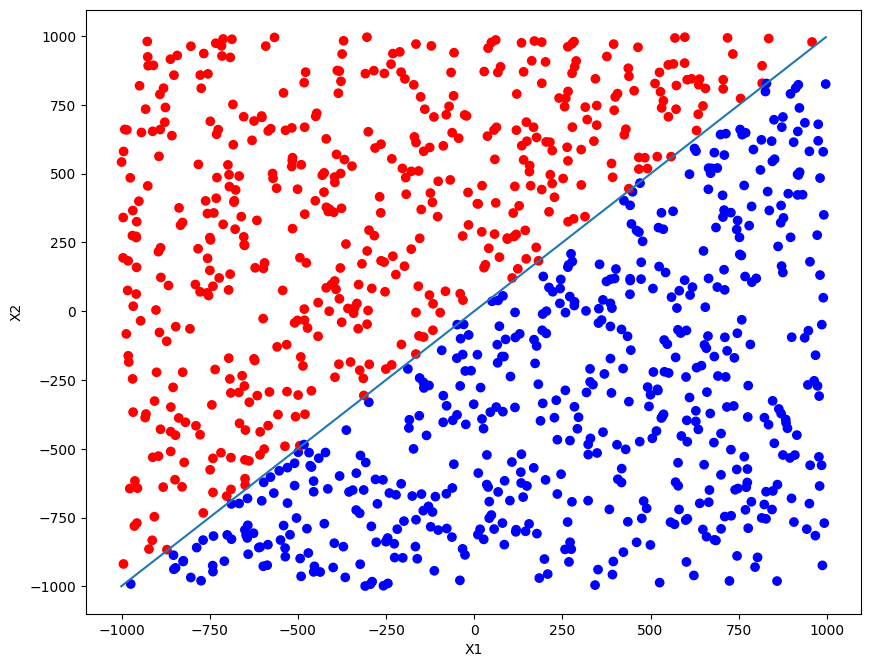

In [20]:
Teste1.grafico()

#Parte 2: Experimentação

In [81]:
data1 = ler_entrada('/content/data1.txt')

experimentacao = []
n = (0.4, 0.1, 0.01) # taxa de aprendizado
I = ([-100, +100], [-0.5, 0.5])
count = 0
for i in range(6):
  experimento = []
  for j in range(10):
    r = Neuronio(data1)
    r.taxa_aprendizado = n[(i%3)]
    r.taxa_inicial = I[(i%2)]
    experimento.append(r) # Add um objeto para cada experimentacao
    count +=1 
    print(f"Rede id: {count} \n"+
    f"n = {r.taxa_aprendizado}\nI={r.taxa_inicial}"+
    "\n\n")
  experimentacao.append(experimento)

Pesos iniciais:
╒═══════════╤══════════╤════════════╕
│      bias │       x1 │         x2 │
╞═══════════╪══════════╪════════════╡
│ -0.358911 │ 0.494232 │ -0.0494359 │
╘═══════════╧══════════╧════════════╛
Rede id: 1 
n = 0.4
I=[-100, 100]


Pesos iniciais:
╒══════════╤═══════════╤══════════╕
│     bias │        x1 │       x2 │
╞══════════╪═══════════╪══════════╡
│ -0.30574 │ -0.460859 │ 0.308321 │
╘══════════╧═══════════╧══════════╛
Rede id: 2 
n = 0.4
I=[-100, 100]


Pesos iniciais:
╒═══════════╤═══════════╤══════════╕
│      bias │        x1 │       x2 │
╞═══════════╪═══════════╪══════════╡
│ -0.364551 │ -0.374075 │ 0.304286 │
╘═══════════╧═══════════╧══════════╛
Rede id: 3 
n = 0.4
I=[-100, 100]


Pesos iniciais:
╒═══════════╤══════════╤═══════════╕
│      bias │       x1 │        x2 │
╞═══════════╪══════════╪═══════════╡
│ -0.348313 │ 0.171677 │ -0.490251 │
╘═══════════╧══════════╧═══════════╛
Rede id: 4 
n = 0.4
I=[-100, 100]


Pesos iniciais:
╒══════════╤═══════════╤══════════╕


## Treinos

In [133]:
def dp(x, media):
  s = 0

  for Xi in x:
    s+=(Xi - media)**2
  
  n = len(x) 
  va = (s/n) #variância 

  return va**(1/2) #desvio padrao


media_ajustes = []
desvioPadrao = []
minimos = []


for exp in experimentacao:
  
  qtd_ajuste = 0
  conjunto = []
  min_epocas = 0
  print(f"\n\n\n/// Treino para o set de n = {exp[0].taxa_aprendizado} x I ={exp[0].taxa_inicial}///\n\n\n")

  for rede in exp:

    rede.treinamento()
    qtd_ajuste += rede.ajustes
    conjunto.append(rede.ajustes)
    if(min_epocas == 0 or min_epocas > rede.epocas):
      min_ajustes = rede.ajustes

  minimos.append(min_ajustes)
  media_ajustes.append(qtd_ajuste/10) # lista de medias de ajustes, tamanho = 6
  desvioPadrao.append(dp(conjunto, qtd_ajuste/10)) # lista de desvio padrao, tamanho = 6





/// Treino para o set de n = 0.4 x I =[-100, 100]///



Na época: 28 Houve 0 ajuste(s)
---
Total de Ajustes: 1509
Total de Épocas: 28
Pesos finais:
╒═════════╤═════════╤═════════╕
│    bias │      x1 │      x2 │
╞═════════╪═════════╪═════════╡
│ 123.241 │ 87.1375 │ 80.7977 │
╘═════════╧═════════╧═════════╛
Na época: 15 Houve 0 ajuste(s)
---
Total de Ajustes: 635
Total de Épocas: 15
Pesos finais:
╒═════════╤═════════╤═════════╕
│    bias │      x1 │      x2 │
╞═════════╪═════════╪═════════╡
│ 64.8943 │ 47.9302 │ 34.9582 │
╘═════════╧═════════╧═════════╛
Na época: 34 Houve 0 ajuste(s)
---
Total de Ajustes: 1883
Total de Épocas: 34
Pesos finais:
╒═════════╤═════════╤═════════╕
│    bias │      x1 │      x2 │
╞═════════╪═════════╪═════════╡
│ 152.835 │ 103.543 │ 100.859 │
╘═════════╧═════════╧═════════╛
Na época: 23 Houve 0 ajuste(s)
---
Total de Ajustes: 1296
Total de Épocas: 23
Pesos finais:
╒═════════╤═════════╤═════════╕
│    bias │      x1 │      x2 │
╞═════════╪═════════╪═════════

# Resultados

### Resultados mostrando os pesos finais

In [143]:
def print_pesos(rede):

  m = np.array([rede.pesos])
  header = ["bias","x1","x2"]
  table = tabulate(m,header,tablefmt="fancy_grid")
  print(table)
  
i = 0
for exp in experimentacao:

  treino = exp[-1]

  taxa_aprendizado = "η = " + str(treino.taxa_aprendizado)
  taxa_inicial = str(treino.taxa_inicial[0])+" ± "+ str(treino.taxa_inicial[1])

  media = media_ajustes[i]
  dp = desvioPadrao[i]
  minimo = minimos[i]
  quantidade_ajustes = str(media) + " ± " + str(dp)
  m = np.array([taxa_aprendizado, taxa_inicial, quantidade_ajustes, minimo])
  m = m.reshape(1,4)
  header = ["Taxa de aprendizado","Intervalo de pesos","Quantidade de ajustes", "Menor numero de épocas para convergência"]
  table = tabulate(m,header,tablefmt="fancy_grid")
  print(table)

  print_pesos(treino)
  
  print("\n\n\n")
  i+=1

╒═══════════════════════╤══════════════════════╤═══════════════════════════╤════════════════════════════════════════════╕
│ Taxa de aprendizado   │ Intervalo de pesos   │ Quantidade de ajustes     │   Menor numero de épocas para convergência │
╞═══════════════════════╪══════════════════════╪═══════════════════════════╪════════════════════════════════════════════╡
│ η = 0.4               │ -100 ± 100           │ 1382.1 ± 311.497817006797 │                                       1175 │
╘═══════════════════════╧══════════════════════╧═══════════════════════════╧════════════════════════════════════════════╛
╒═════════╤═════════╤═════════╕
│    bias │      x1 │      x2 │
╞═════════╪═════════╪═════════╡
│ 102.761 │ 65.4286 │ 65.4768 │
╘═════════╧═════════╧═════════╛




╒═══════════════════════╤══════════════════════╤════════════════════════════╤════════════════════════════════════════════╕
│ Taxa de aprendizado   │ Intervalo de pesos   │ Quantidade de ajustes      │   Menor numero de épocas 

### Tabela Resultados completa, sem pesos finais

In [193]:
i = 0
dados = []
for exp in experimentacao:

  treino = exp[-1]

  taxa_aprendizado = "η = " + str(treino.taxa_aprendizado)
  taxa_inicial = "("+str(treino.taxa_inicial[0])+" ± "+ str(treino.taxa_inicial[1])+")"
  media = media_ajustes[i]
  dp = round(desvioPadrao[i], 2)
  minimo = minimos[i]
  quantidade_ajustes = str(media) + " ± " + str(dp)

  linha = [taxa_aprendizado+"                   "+taxa_inicial, quantidade_ajustes, minimo]
  dados.append(linha)
  i +=1 

m = np.array(dados[0])
m = m.reshape(1,3)
for i in range(1, len(dados)):
  m = np.append(m, np.array(dados[i]).reshape(1,3), axis= 0)

header = ["             Configurações\nTaxa de aprendizado    Intervalo de Pesos",
          "Quantidade de ajustes", "Menor numero de épocas\npara convergência"]
table = tabulate(m,header,tablefmt="presto")

print(table)


              Configurações                  | Quantidade de ajustes   |   Menor numero de épocas
 Taxa de aprendizado    Intervalo de Pesos   |                         |        para convergência
---------------------------------------------+-------------------------+--------------------------
 η = 0.4                   (-100 ± 100)      | 1382.1 ± 311.5          |                     1175
 η = 0.1                   (-0.5 ± 0.5)      | 1471.8 ± 522.39         |                     2584
 η = 0.01                   (-100 ± 100)     | 1179.7 ± 480.69         |                      751
 η = 0.4                   (-0.5 ± 0.5)      | 1429.6 ± 335.83         |                     1150
 η = 0.1                   (-100 ± 100)      | 1737.8 ± 410.64         |                     1816
 η = 0.01                   (-0.5 ± 0.5)     | 1110.8 ± 243.52         |                      757


#Graficos

###n x I = 0.4 x  [-100, 100]

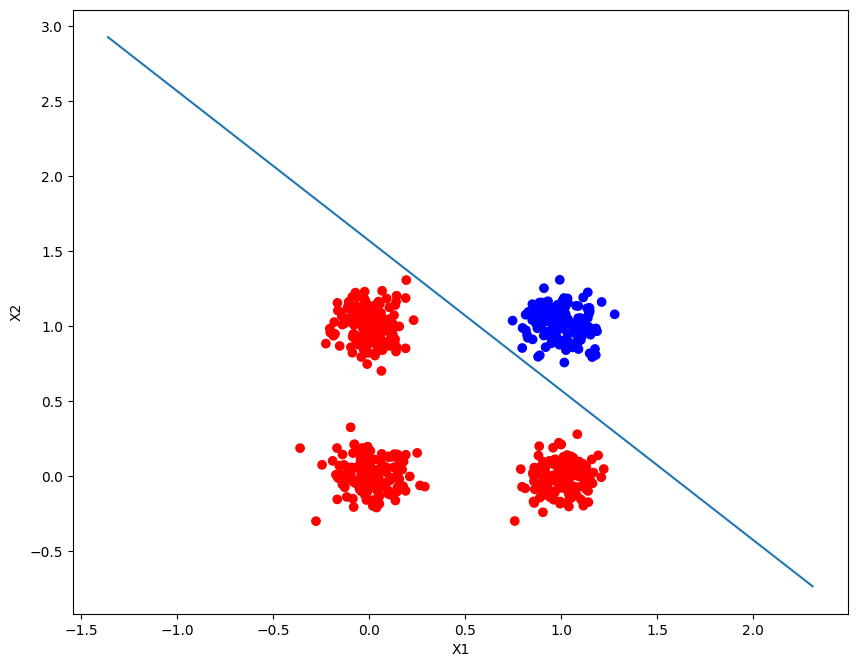

In [126]:
experimentacao[0][-1].grafico()

###n x I = 0.1 X  [-0.5, 0.5]

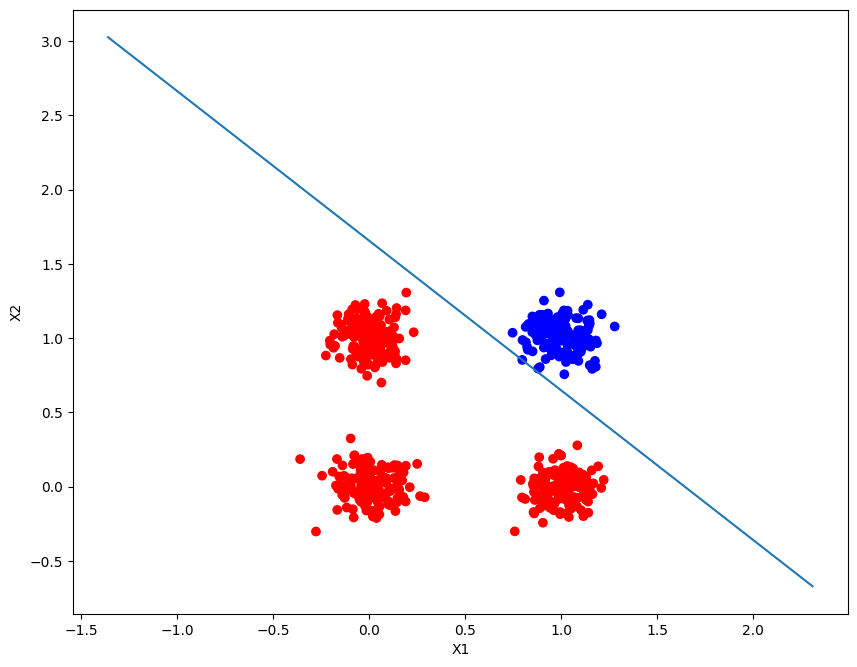

In [127]:
experimentacao[1][-1].grafico()

###n x I =  0.01 X  [-100, 100]

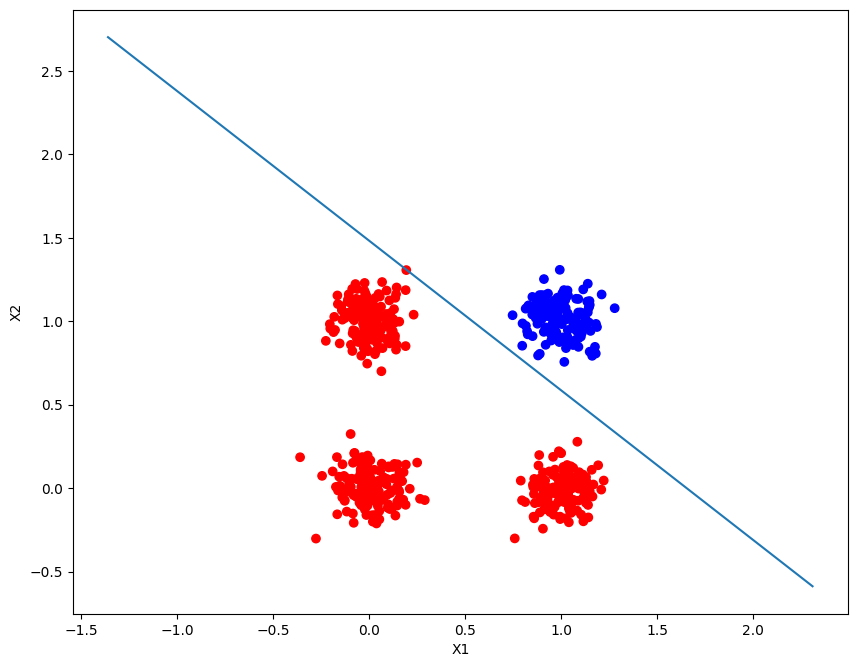

In [128]:
experimentacao[2][-1].grafico()

###n x I = 0.4 x [-0.5, 0.5]


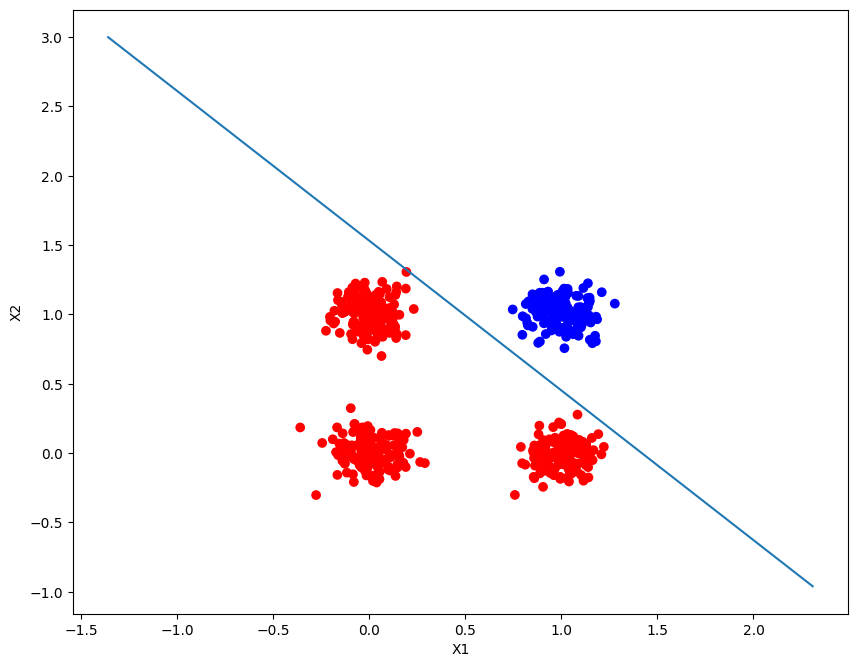

In [129]:
experimentacao[3][-1].grafico()

###n x I = 0.1 x [-100, 100]


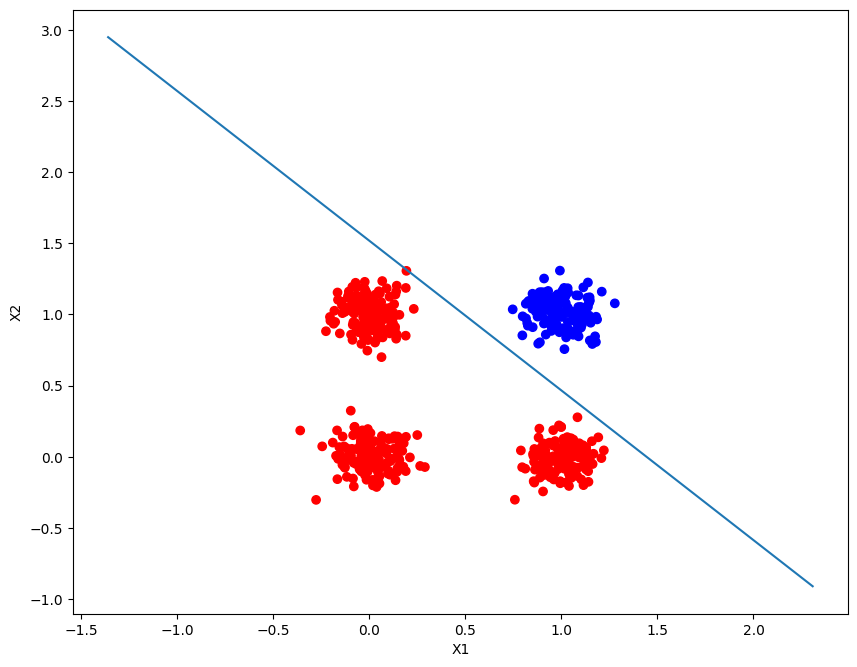

In [130]:
experimentacao[4][-1].grafico()

###n x I = 0.01 x [-0.5, 0.5]


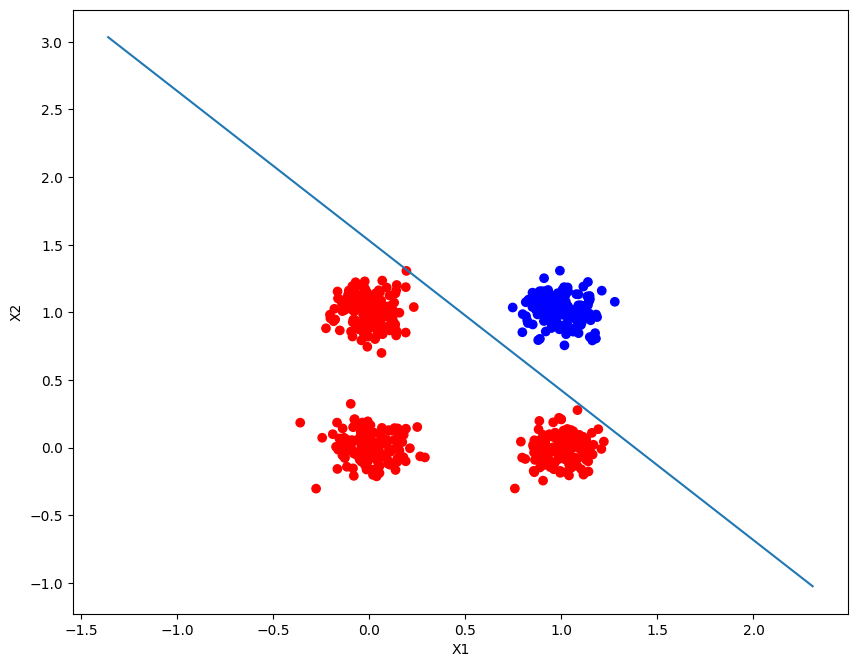

In [131]:
experimentacao[5][-1].grafico()

### Comparação de todos os graficos evidenciando que todos convergiram indepdendente das configurações iniciais

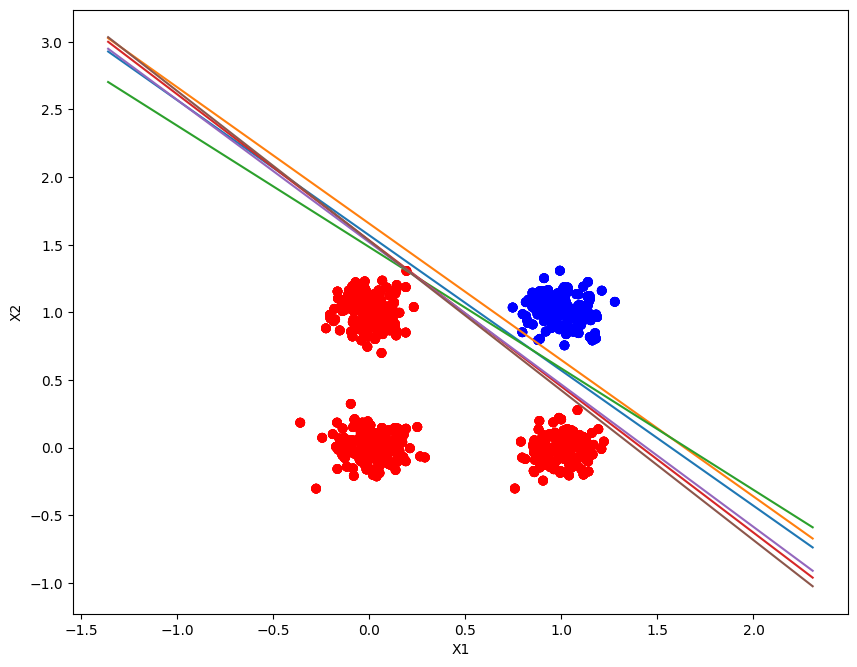

In [132]:
for i in range(6):
  experimentacao[i][-1].grafico()